# Trainer

In [1]:
import cv2
from super_resolution import *
%matplotlib inline

In [2]:
tf.reset_default_graph()

In [3]:
height = 50
width = 50
channel = 3

img_list = []
img_list_1 = load_imgs("./data/urban_hr", (width, height))
img_list_2 = load_imgs("./data/celeba", (width, height))
img_list.extend(img_list_1)
img_list.extend(img_list_2)

X_all = np.array(blur_img_list(img_list, (width, height)))
Y_all = np.array(img_list)

mean_img = np.mean(Y_all, axis=0)
std_img = np.std(Y_all, axis=0)

# data|
rand_idx = np.random.permutation(range(len(X_all)))
X_all = X_all[rand_idx]
Y_all = Y_all[rand_idx]

train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1

data_num = len(X_all)
train_data_num = round(data_num * train_ratio)
valid_data_num = round(data_num * valid_ratio)
test_data_num = round(data_num * test_ratio)

X_train = X_all[:train_data_num]
Y_train = Y_all[:train_data_num]
X_valid = X_all[train_data_num:train_data_num + valid_data_num]
Y_valid = Y_all[train_data_num:train_data_num + valid_data_num]
X_test = X_all[train_data_num + valid_data_num:train_data_num + valid_data_num + test_data_num]
Y_test = Y_all[train_data_num + valid_data_num:train_data_num + valid_data_num + test_data_num]



In [4]:
sess = tf.Session()
usrcnn = USRCNN(sess)

In [5]:
#usrcnn.load(sess,'./model/weights','./model/meta_data.pickle')

make mean_img and std_img
epoh_i : 0
loss : 109.30125427246094
------------------------------
Saved!
weights_path : ./model/weights
meta_data_path : ./model/meta_data.pickle
------------------------------
epoh_i : 1
loss : 100.067138671875
------------------------------
Saved!
weights_path : ./model/weights
meta_data_path : ./model/meta_data.pickle
------------------------------
epoh_i : 2
loss : 97.51654052734375
------------------------------
Saved!
weights_path : ./model/weights
meta_data_path : ./model/meta_data.pickle
------------------------------
epoh_i : 3
loss : 95.63507080078125
------------------------------
Saved!
weights_path : ./model/weights
meta_data_path : ./model/meta_data.pickle
------------------------------
epoh_i : 4
loss : 92.69778442382812
------------------------------
Saved!
weights_path : ./model/weights
meta_data_path : ./model/meta_data.pickle
------------------------------
epoh_i : 5
loss : 89.61976623535156
------------------------------
Saved!
weights_pa

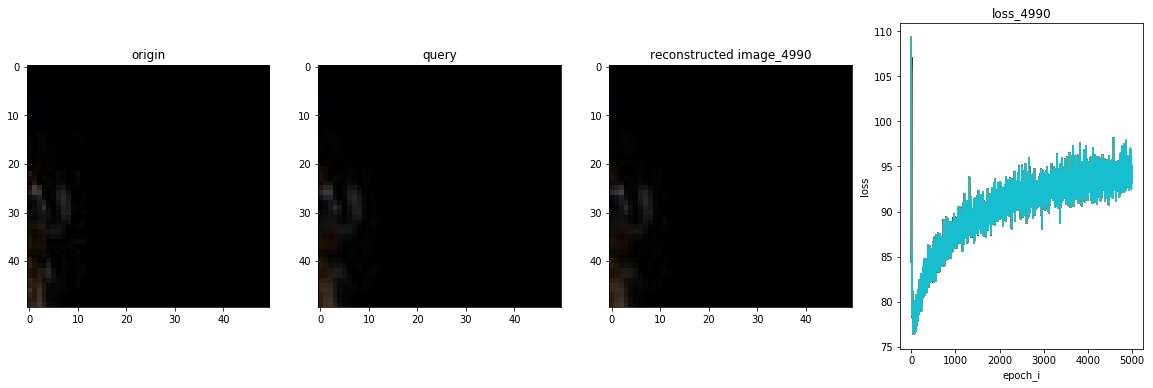

In [6]:
usrcnn.train(X_train, Y_train, X_valid=X_valid, Y_valid=Y_valid,
              batch_size=64, n_epoch=5000, start_learning_rate=0.001, save_dir_path='./model')

In [7]:
import os
def load_imgs_2(dir_path):
    name_list = os.listdir(dir_path)

    img_list = []

    for name in name_list:
        img_path = "{}/{}".format(dir_path, name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_list.append(img)
    return img_list


In [17]:
test_img_list = load_imgs_2("./data/celeba")
test_img = test_img_list[20]
test_img_resized = cv2.resize(test_img, (test_img.shape[1]//2, test_img.shape[0]//2), interpolation = cv2.INTER_CUBIC)
test_img_resized = cv2.resize(test_img_resized, (test_img.shape[1],test_img.shape[0]), interpolation = cv2.INTER_CUBIC)

In [18]:
result = usrcnn.enhance_resolution(test_img_resized)

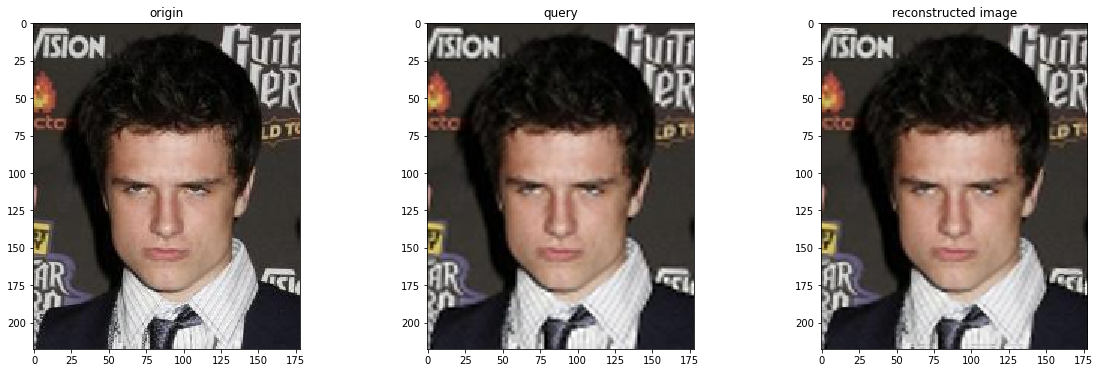

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].imshow(test_img)
axs[0].set_title("origin")
axs[1].imshow(test_img_resized)
axs[1].set_title("query")
axs[2].imshow(result)
axs[2].set_title("reconstructed image")

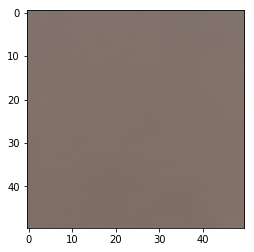

In [11]:
plt.imshow(usrcnn.mean_img.astype(np.uint8))

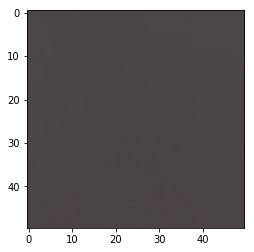

In [12]:
plt.imshow(usrcnn.std_img.astype(np.uint8))

In [13]:
usrcnn.std_img

array([[[ 75.83640339,  70.32258432,  73.147739  ],
        [ 75.73194483,  70.20593411,  73.13744119],
        [ 75.66749465,  70.11069931,  73.14229217],
        ..., 
        [ 76.12880232,  70.5873864 ,  73.55959816],
        [ 76.16539667,  70.69718959,  73.64794582],
        [ 75.8970194 ,  70.49808283,  73.63496171]],

       [[ 75.73912578,  70.15464394,  73.08430573],
        [ 75.7457803 ,  70.1405751 ,  73.04396074],
        [ 75.78803463,  70.28687807,  73.25770301],
        ..., 
        [ 76.15730593,  70.73854963,  73.72378727],
        [ 75.95240194,  70.59010331,  73.63988812],
        [ 75.79488486,  70.44686421,  73.60233548]],

       [[ 75.73629615,  70.19852492,  73.14092284],
        [ 75.88160843,  70.23510255,  73.14694419],
        [ 75.63394737,  70.01472756,  72.93680054],
        ..., 
        [ 76.07163959,  70.63979385,  73.53816953],
        [ 75.95199935,  70.550687  ,  73.493704  ],
        [ 75.82515129,  70.43719986,  73.56949361]],

       ..., 
   